# Part A :- Data Pre-processing and Visualization
# Objective:- To determine whether a person is covid +ve or not
Note:
The data obtained is from the Mexican government and hence, the analysis is valid for Mexico or maybe North America. The pandemic stats and behaviours are extremely different for Asian countries when compared to North American or European countries owing to far lower case fatality rate for Asia.

##  Importing relevant Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r'C:\Users\aa\OneDrive\Documents\Mechanical Engineering\sem 1 2020-21\IME672A\Project\covid.csv')


In [4]:
df

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,...,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,...,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,...,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,...,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,...,2,1,2,1,2,2,2,99,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,01ff60,2,1,13-05-2020,03-05-2020,9999-99-99,97,2,58,97,...,2,2,2,2,2,2,2,2,3,97
566598,047cd1,1,1,07-04-2020,06-04-2020,9999-99-99,97,2,48,2,...,2,2,2,2,2,2,2,2,3,97
566599,1beb81,1,2,14-05-2020,01-05-2020,9999-99-99,2,1,49,2,...,2,2,2,2,1,2,2,99,3,2
566600,16fb02,1,1,31-05-2020,29-05-2020,9999-99-99,97,1,43,2,...,2,2,2,2,2,2,2,2,3,97


By looking at the above data, although it is hard to interpret the significance of the numbers mentioned, but we can try to guess.

For Ex. In date_died column if a person is dead, the death date in mentioned, otherwise default value 9999-99-99 is given.

Lets just check how many colums are there.

In [10]:
print(df.columns.size)
df.columns

23


Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

There are many colums (attributes) and so much unorganised and unclean data. So we first need to clean it, by applying Data-Preprocessing techniques.

# Data Pre-processing
## 1. Data Cleaning
From data pattern we can guess that there might be some unique values in some colums. Although id,age, date_symptoms,date_died etc. can not be unique. Lets analyze accordingly.

In [11]:
for i in df.columns:
    if i in ['id','entry_date','date_symptoms','date_died','age']:
        continue
    else:
        print('unique values in '+ i +' column- ',end=' ')
        print(df[i].unique())

unique values in sex column-  [2 1]
unique values in patient_type column-  [1 2]
unique values in intubed column-  [97  2  1 99]
unique values in pneumonia column-  [ 2  1 99]
unique values in pregnancy column-  [97  2  1 98]
unique values in diabetes column-  [ 2  1 98]
unique values in copd column-  [ 2  1 98]
unique values in asthma column-  [ 2  1 98]
unique values in inmsupr column-  [ 2  1 98]
unique values in hypertension column-  [ 2  1 98]
unique values in other_disease column-  [ 2  1 98]
unique values in cardiovascular column-  [ 2  1 98]
unique values in obesity column-  [ 2  1 98]
unique values in renal_chronic column-  [ 2  1 98]
unique values in tobacco column-  [ 2  1 98]
unique values in contact_other_covid column-  [ 2 99  1]
unique values in covid_res column-  [1 2 3]
unique values in icu column-  [97  2  1 99]


## 1.1 Data Descriptors
These features are categorical so we convert them into different categories as follows:

(a) Sex:-  Female (1), Male (2)

(b) Patient_type:- Outpatient (1), Inpatient (2)

(c) Columns with preconditions like pregnancy, diabetes, copd, asthma etc:-  Yes (1), No (2)

(d) Covid result:- Positive  (1), Negative  (2), Results Awaited  (3)

The values 97, 98, 99 indicate that the data is not available for these cells.

Okay great! Now that we have the available descriptors of each column, we can move forward with the cleaning and wrangling of the data.

We have to predict whether a person is Covid +ve or -ve based on the preconditions. So let us check the data types of the features given. We also check how many people are Covid positive or negative in this dataset to check how skewed the dataset is.

In [17]:
df.info()
print('\nCovid Result positive-',len(df[df['covid_res']==1]))  #Covid Result positive
print('Covid Result negative-',len(df[df['covid_res']==2]))  #Covid Result negative
print('Covid result awaited-',len(df[df['covid_res']==3]))  #Covid result awaited

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566602 entries, 0 to 566601
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id                   566602 non-null  object
 1   sex                  566602 non-null  int64 
 2   patient_type         566602 non-null  int64 
 3   entry_date           566602 non-null  object
 4   date_symptoms        566602 non-null  object
 5   date_died            566602 non-null  object
 6   intubed              566602 non-null  int64 
 7   pneumonia            566602 non-null  int64 
 8   age                  566602 non-null  int64 
 9   pregnancy            566602 non-null  int64 
 10  diabetes             566602 non-null  int64 
 11  copd                 566602 non-null  int64 
 12  asthma               566602 non-null  int64 
 13  inmsupr              566602 non-null  int64 
 14  hypertension         566602 non-null  int64 
 15  other_disease        566602 non-nu

### No null values present in the data

As a first step towards data cleaning, let us convert the date columns to a datetime datatype

Date Columns:- entry_date,  date_symptoms,  date_died

In [26]:
date_cols=['entry_date','date_symptoms']
for dates in date_cols:
    df[dates]=pd.to_datetime(df[dates],infer_datetime_format=True)

# cleaning Date_died column
df['date_died'].replace('9999-99-99','NA',inplace=True)
date_cols.append('date_died')
#df[date_cols_2]
df[date_cols]

,entry_date,date_symptoms,date_died
0,2020-04-05,2020-02-05,NA
1,2020-03-19,2020-03-17,NA
2,2020-06-04,2020-01-04,NA
3,2020-04-17,2020-10-04,NA
4,2020-04-13,2020-04-13,22-04-2020
...,...,...,...
566597,2020-05-13,2020-03-05,NA
566598,2020-07-04,2020-06-04,NA
566599,2020-05-14,2020-01-05,NA
566600,2020-05-31,2020-05-29,NA


In [27]:
df=df[['sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died', 'age',
       'intubed', 'pneumonia', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu']]

In [28]:
df.iloc[:,6:]=df.iloc[:,6:].replace([97,98,99],np.nan)
df.iloc[:,6:]=df.iloc[:,6:].replace(1,'Yes')
df.iloc[:,6:]=df.iloc[:,6:].replace(2,'No')

df.iloc[:,-2]=df.iloc[:,-2].replace('Yes','Positive')
df.iloc[:,-2]=df.iloc[:,-2].replace('No','Negative')
df.iloc[:,-2]=df.iloc[:,-2].replace(3,'Results awaited')

C:\Users\aa\Anaconda3_2020\lib\site-packages\pandas\core\indexing.py:1717: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)
C:\Users\aa\Anaconda3_2020\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [29]:
df.head()

,sex,patient_type,entry_date,date_symptoms,date_died,age,intubed,pneumonia,pregnancy,diabetes,...,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,2,1,2020-04-05,2020-02-05,NA,27,NaN,No,NaN,No,...,No,No,No,No,No,No,No,No,Positive,NaN
1,2,1,2020-03-19,2020-03-17,NA,24,NaN,No,NaN,No,...,No,No,No,No,No,No,No,NaN,Positive,NaN
2,1,2,2020-06-04,2020-01-04,NA,54,No,No,No,No,...,No,No,No,No,Yes,No,No,NaN,Positive,No
3,2,2,2020-04-17,2020-10-04,NA,30,No,Yes,NaN,No,...,No,No,No,No,No,No,No,NaN,Positive,No
4,1,2,2020-04-13,2020-04-13,22-04-2020,60,No,No,No,Yes,...,No,Yes,No,Yes,No,No,No,NaN,Positive,No


## 2. Data Visualization
### Null value Heatmap

Text(0.5, 1.0, 'Null value heatmap')

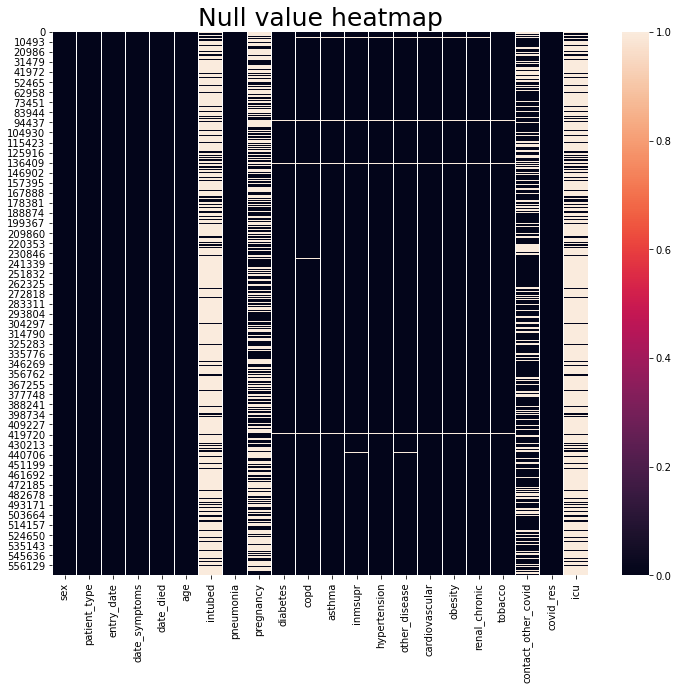

In [30]:
plt.figure(figsize=(12,10))
sns.heatmap(df.isnull())
plt.title('Null value heatmap',size=25)

High number of null values can be seen in intubed, pregnancy,contact_other_covid and icu features

### Hypothesis

Here, we have to predict whether a person is Covid +ve or -ve based on the preconditions. So, we have proposed following points in our hypothesis and attempt to verify them

1. The fatality or the 'date_died' column has no role to play in determining Covid +ve or -ve. So we can drop that column.
2. We know that persons suffering from underlying health conditions especially respiratory infection have high chances of being positive. So, we check the preconditions like pneumonia and asthma and whether the person is intubed.
3. The column 'contact_other_covid' can also have a crucial role in determining the result as the virus spreads ro rapidly.

So, we attempt to check how these and different other features contribute to person being positive or negative.

Since we are focusing on giving the chances of being affected by corona,so our main focus will be on either chance is positive or negative, hence we'll neglect awaiting chances.. Now here i am dropping all those rows which contains chance is awaiting i.e.3 value

In [31]:
df=df[df['covid_res']!='Results awaited']

Let us first observe the effect of those attributes which have maximum null values in data set.
i.e intubed, pregnancy,contact_other_covid and icu features
### 1. Intubation

In [33]:
df['intubed'].isna().value_counts()
# True indicates the NULL Values

True     392268
False    107424
Name: intubed, dtype: int64

Intubation information reported (yes/no) :- 107424

Rest are all Null values i.e. 392268

Text(0.5, 1.0, 'Reported intubations \n \n  Ratio=11')

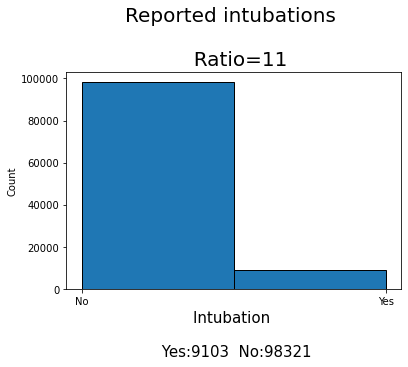

In [34]:
#FROM THE REPORTED INTUBATION
%matplotlib inline
# plt.figure(figsize=(8,10))
ax=plt.hist(df['intubed'][df['intubed'].isna()==False],bins=2,edgecolor='black')
plt.xticks(size=10,)
plt.xlabel('Intubation \n \n Yes:{}  No:{}'.format(df['intubed'].value_counts()[1] , df['intubed'].value_counts()[0]),size=15)
plt.ylabel('Count',size=10)
plt.title('Reported intubations \n \n  Ratio={0:.0f}'.format(df['intubed'].value_counts()[0]/df['intubed'].value_counts()[1])
          ,size=20)

### Intubation test positivity
Through this metric we try to understand what are the chances of being COVID +ve if the patient is intubated.

C:\Users\aa\Anaconda3_2020\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 6.79999999999999, 'Results \n Test postivity rate: 71.94 %')

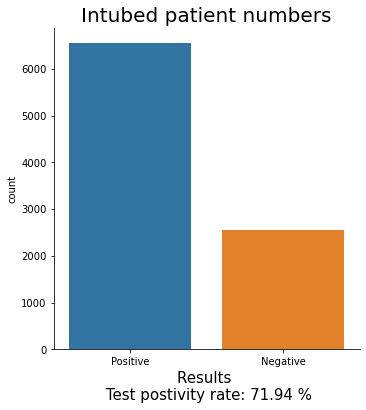

In [35]:
df_intubed=df[df['intubed']=='Yes']
sns.catplot('covid_res',data=df_intubed,kind='count')
plt.title('Intubed patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_intubed['covid_res'].value_counts()[0]/df_intubed['covid_res'].size),size=15)

From this we can say that, for 100 patients who are intubed there are 72 pateints who might be covid positive
#### Intubation is a good indicator, so as to predict whether the person is Covid +ve or not

### 2. Pregnancy

In [37]:
df['pregnancy'].isna().value_counts()
# True indicates the NULL Values
# False indicates total reported pregnancy (might be yes or no)

True     254434
False    245258
Name: pregnancy, dtype: int64

Text(0.5, 1.0, 'Reported pregnancy \n \n  Ratio=67')

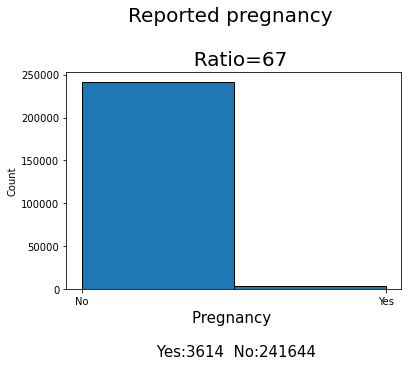

In [36]:
ax=plt.hist(df['pregnancy'][df['pregnancy'].isna()==False],bins=2,edgecolor='black')
plt.xticks(size=10,)
plt.xlabel('Pregnancy \n \n Yes:{}  No:{}'.format(df['pregnancy'].value_counts()[1] , df['pregnancy'].value_counts()[0]),size=15)
plt.ylabel('Count',size=10)
plt.title('Reported pregnancy \n \n  Ratio={0:.0f}'.format(df['pregnancy'].value_counts()[0]/df['pregnancy'].value_counts()[1])
          ,size=20)

### Pregnancy test positivity
Through this metric we try to understand what are the chances of a person being COVID +ve if she is pregnant.

C:\Users\aa\Anaconda3_2020\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, 'Positive'), Text(1, 0, 'Negative')])

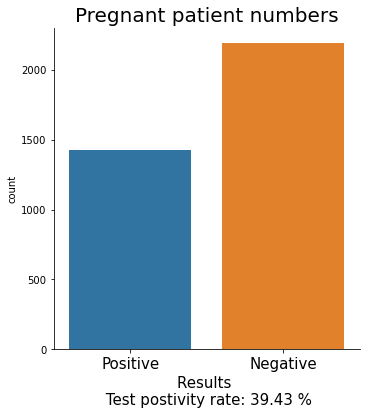

In [38]:
df_pregnancy=df[df['pregnancy']=='Yes']
sns.catplot('covid_res',data=df_pregnancy,kind='count')
plt.title('Pregnant patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_pregnancy['covid_res'].value_counts()[1]/df_pregnancy['covid_res'].size),size=15)
plt.xticks(size=15)

From the above charts, Most of the women's who are pregnant are found to be covid -ve. Although there is not much sifgnifiact difference in Covid positivity and negativity rates.
#### Pregnancy is not a good indicator to predict Covid positivity

### 3. Contact with Other Covid +ve person

In [40]:
df['contact_other_covid'].isna().value_counts()
# True indicates the NULL Values
# False indicates total reported data (might be yes or no)

False    346017
True     153675
Name: contact_other_covid, dtype: int64

Text(0.5, 1.0, 'contact_other_covid \n \n  Ratio=1.32')

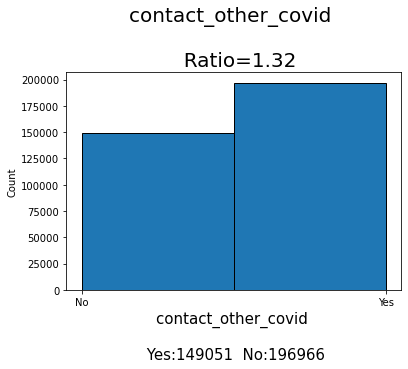

In [41]:
ax=plt.hist(df['contact_other_covid'][df['contact_other_covid'].isna()==False],bins=2,edgecolor='black')
plt.xticks(size=10,)
plt.xlabel('contact_other_covid \n \n Yes:{}  No:{}'.format(df['contact_other_covid'].value_counts()[1] , df['contact_other_covid'].value_counts()[0]),size=15)
plt.ylabel('Count',size=10)
plt.title('contact_other_covid \n \n  Ratio={0:.02f}'.format(df['contact_other_covid'].value_counts()[0]/df['contact_other_covid'].value_counts()[1])
          ,size=20)

###  Contact Test positivity
Through this metric we try to understand what are the chances of a person being COVID +ve if he/she recently came in contact with other infected person.

C:\Users\aa\Anaconda3_2020\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, 'Positive'), Text(1, 0, 'Negative')])

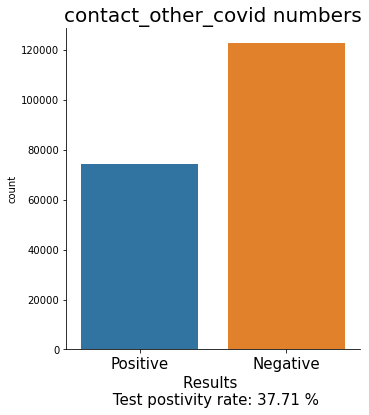

In [44]:
# FROM THOSE WHO ARE REPORTED YES
df_contact_other_covid=df[df['contact_other_covid']=='Yes']
sns.catplot('covid_res',data=df_contact_other_covid,kind='count')
plt.title('contact_other_covid numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_contact_other_covid['covid_res'].value_counts()[1]/df_contact_other_covid['covid_res'].size),size=15)
plt.xticks(size=15)

#### Just contacting other covid+ve person doesn't guarantee Covid positivity. 
This might be the indicator if other attribute values are provided

### 4. ICU reported patients

In [46]:
df['icu'].isna().value_counts()
# True indicates the NULL Values
# False indicates total reported data (might be yes or no)

True     392269
False    107423
Name: icu, dtype: int64

Text(0.5, 1.0, 'icu \n \n  Ratio=11')

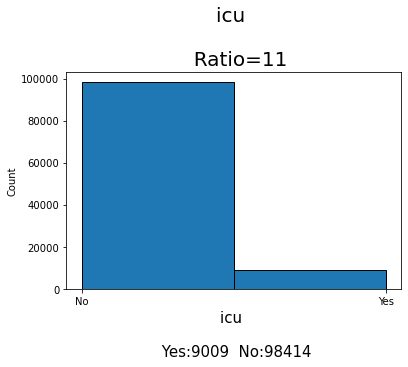

In [45]:
ax=plt.hist(df['icu'][df['icu'].isna()==False],bins=2,edgecolor='black')
plt.xticks(size=10,)
plt.xlabel('icu \n \n Yes:{}  No:{}'.format(df['icu'].value_counts()[1] , df['icu'].value_counts()[0]),size=15)
plt.ylabel('Count',size=10)
plt.title('icu \n \n  Ratio={0:.0f}'.format(df['icu'].value_counts()[0]/df['icu'].value_counts()[1])
          ,size=20)


### ICU patient's  test positivity
Through this metric we try to understand what are the chances of a person being COVID +ve if he/she is in ICU.

C:\Users\aa\Anaconda3_2020\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1]), [Text(0, 0, 'Positive'), Text(1, 0, 'Negative')])

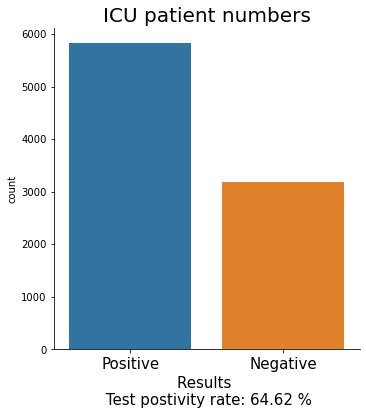

In [47]:
df_icu=df[df['icu']=='Yes']
sns.catplot('covid_res',data=df_icu,kind='count')
plt.title('ICU patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_icu['covid_res'].value_counts()[0]/df_icu['covid_res'].size),size=15)
plt.xticks(size=15)

here also Covid positivity rate is quite high.
#### ICU report is the good indicator to predict whether the person is Covid +ve or not

### 5. Other Disease reports analysis

In [48]:
df.columns

Index(['sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'age', 'intubed', 'pneumonia', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

Text(0.5, 1.0, 'tobacco Ratio=11')

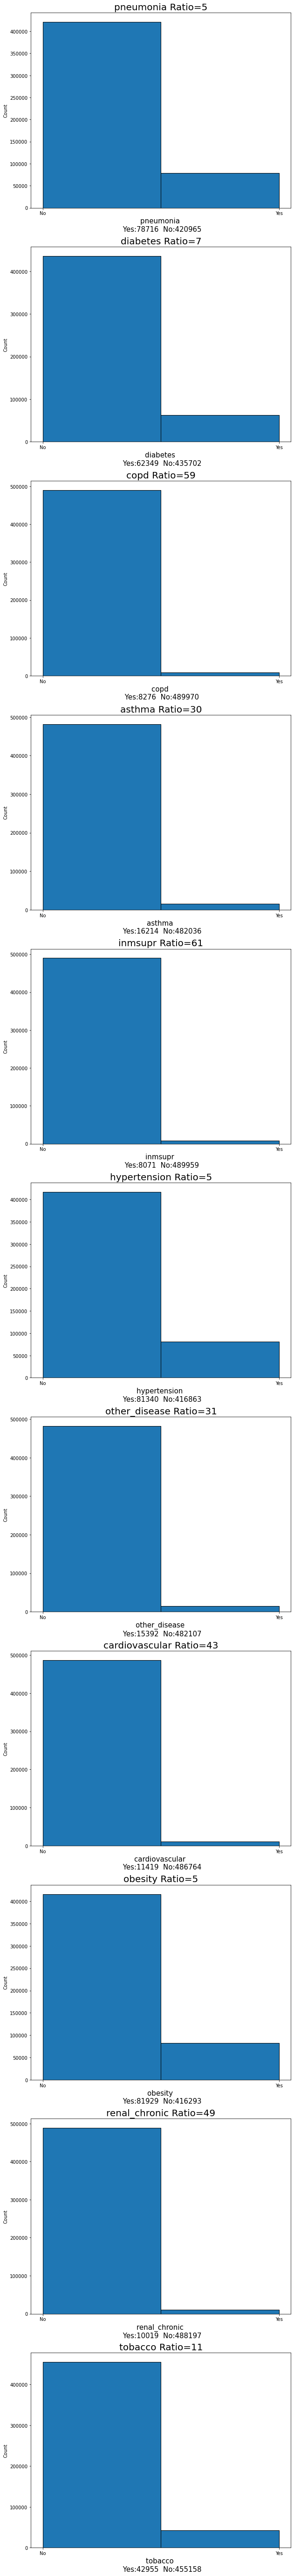

In [49]:
fig2=plt.figure(figsize=(22,100))

ax1=fig2.add_subplot(11,2,1)
plt.hist(df['pneumonia'][df['pneumonia'].isna()==False],bins=2,edgecolor='black')
plt.xticks(size=10,)
plt.xticks(size=10,)
plt.xlabel('pneumonia \n Yes:{}  No:{}'.format(df['pneumonia'].value_counts()[1] , df['pneumonia'].value_counts()[0]),size=15)
plt.ylabel('Count',size=10)
plt.title('pneumonia Ratio={0:.0f}'.format(df['pneumonia'].value_counts()[0]/df['pneumonia'].value_counts()[1])
          ,size=20)

# ax2=fig2.add_subplot(11,2,2)
# df_pneumonia=df[df['pneumonia']=='Yes']
# sns.catplot('covid_res',data=df_pneumonia,kind='count')
# plt.title('pneumonia patient numbers',size=20)
# plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
#     100* df_pneumonia['covid_res'].value_counts()[0]/df_pneumonia['covid_res'].size),size=15)
# plt.xticks(size=10,)

ax3=fig2.add_subplot(11,2,3)
plt.hist(df['diabetes'][df['diabetes'].isna()==False],bins=2,edgecolor='black')
plt.xticks(size=10,)
plt.xticks(size=10,)
plt.xlabel('diabetes \n Yes:{}  No:{}'.format(df['diabetes'].value_counts()[1] , df['diabetes'].value_counts()[0]),size=15)
plt.ylabel('Count',size=10)
plt.title('diabetes Ratio={0:.0f}'.format(df['diabetes'].value_counts()[0]/df['diabetes'].value_counts()[1])
          ,size=20)

# ax4=fig2.add_subplot(11,2,4)
# # df_icu=df[df['diabetes']=='Yes']
# # sns.catplot('covid_res',data=df_icu,kind='count')
# # plt.title('diabetes patient numbers',size=20)
# # plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
# #     100* df_icu['covid_res'].value_counts()[0]/df_icu['covid_res'].size),size=15)
# # plt.xticks(size=15)

ax5=fig2.add_subplot(11,2,5)
plt.hist(df['copd'][df['copd'].isna()==False],bins=2,edgecolor='black')
plt.xticks(size=10,)
plt.xticks(size=10,)
plt.xlabel('copd \n Yes:{}  No:{}'.format(df['copd'].value_counts()[1] , df['copd'].value_counts()[0]),size=15)
plt.ylabel('Count',size=10)
plt.title('copd Ratio={0:.0f}'.format(df['copd'].value_counts()[0]/df['copd'].value_counts()[1])
          ,size=20)

# ax6=fig2.add_subplot(11,2,6)
# # df_icu=df[df['icu']=='Yes']
# # sns.catplot('covid_res',data=df_icu,kind='count')
# # plt.title('ICU patient numbers',size=20)
# # plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
# #     100* df_icu['covid_res'].value_counts()[0]/df_icu['covid_res'].size),size=15)
# # plt.xticks(size=15)

ax7=fig2.add_subplot(11,2,7)
plt.hist(df['asthma'][df['asthma'].isna()==False],bins=2,edgecolor='black')
plt.xticks(size=10,)
plt.xticks(size=10,)
plt.xlabel('asthma \n Yes:{}  No:{}'.format(df['asthma'].value_counts()[1] , df['asthma'].value_counts()[0]),size=15)
plt.ylabel('Count',size=10)
plt.title('asthma Ratio={0:.0f}'.format(df['asthma'].value_counts()[0]/df['asthma'].value_counts()[1])
          ,size=20)

# ax8=fig2.add_subplot(11,2,8)
# # df_icu=df[df['icu']=='Yes']
# # sns.catplot('covid_res',data=df_icu,kind='count')
# # plt.title('ICU patient numbers',size=20)
# # plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
# #     100* df_icu['covid_res'].value_counts()[0]/df_icu['covid_res'].size),size=15)
# # plt.xticks(size=15)

ax9=fig2.add_subplot(11,2,9)
plt.hist(df['inmsupr'][df['inmsupr'].isna()==False],bins=2,edgecolor='black')
plt.xticks(size=10,)
plt.xticks(size=10,)
plt.xlabel('inmsupr \n Yes:{}  No:{}'.format(df['inmsupr'].value_counts()[1] , df['inmsupr'].value_counts()[0]),size=15)
plt.ylabel('Count',size=10)
plt.title('inmsupr Ratio={0:.0f}'.format(df['inmsupr'].value_counts()[0]/df['inmsupr'].value_counts()[1])
          ,size=20)

# ax10=fig2.add_subplot(11,2,10)

ax11=fig2.add_subplot(11,2,11)
plt.hist(df['hypertension'][df['hypertension'].isna()==False],bins=2,edgecolor='black')
plt.xticks(size=10,)
plt.xticks(size=10,)
plt.xlabel('hypertension \n Yes:{}  No:{}'.format(df['hypertension'].value_counts()[1] , df['hypertension'].value_counts()[0]),size=15)
plt.ylabel('Count',size=10)
plt.title('hypertension Ratio={0:.0f}'.format(df['hypertension'].value_counts()[0]/df['hypertension'].value_counts()[1])
          ,size=20)

# ax12=fig2.add_subplot(11,2,12)

ax13=fig2.add_subplot(11,2,13)
plt.hist(df['other_disease'][df['other_disease'].isna()==False],bins=2,edgecolor='black')
plt.xticks(size=10,)
plt.xticks(size=10,)
plt.xlabel('other_disease \n Yes:{}  No:{}'.format(df['other_disease'].value_counts()[1] , df['other_disease'].value_counts()[0]),size=15)
plt.ylabel('Count',size=10)
plt.title('other_disease Ratio={0:.0f}'.format(df['other_disease'].value_counts()[0]/df['other_disease'].value_counts()[1])
          ,size=20)

# ax14=fig2.add_subplot(11,2,14)

ax15=fig2.add_subplot(11,2,15)
plt.hist(df['cardiovascular'][df['cardiovascular'].isna()==False],bins=2,edgecolor='black')
plt.xticks(size=10,)
plt.xticks(size=10,)
plt.xlabel('cardiovascular \n Yes:{}  No:{}'.format(df['cardiovascular'].value_counts()[1] , df['cardiovascular'].value_counts()[0]),size=15)
plt.ylabel('Count',size=10)
plt.title('cardiovascular Ratio={0:.0f}'.format(df['cardiovascular'].value_counts()[0]/df['cardiovascular'].value_counts()[1])
          ,size=20)

# ax16=fig2.add_subplot(11,2,16)

ax17=fig2.add_subplot(11,2,17)
plt.hist(df['obesity'][df['obesity'].isna()==False],bins=2,edgecolor='black')
plt.xticks(size=10,)
plt.xticks(size=10,)
plt.xlabel('obesity \n Yes:{}  No:{}'.format(df['obesity'].value_counts()[1] , df['obesity'].value_counts()[0]),size=15)
plt.ylabel('Count',size=10)
plt.title('obesity Ratio={0:.0f}'.format(df['obesity'].value_counts()[0]/df['obesity'].value_counts()[1])
          ,size=20)

# ax18=fig2.add_subplot(11,2,18)

ax19=fig2.add_subplot(11,2,19)
plt.hist(df['renal_chronic'][df['renal_chronic'].isna()==False],bins=2,edgecolor='black')
plt.xticks(size=10,)
plt.xticks(size=10,)
plt.xlabel('renal_chronic \n Yes:{}  No:{}'.format(df['renal_chronic'].value_counts()[1] , df['renal_chronic'].value_counts()[0]),size=15)
plt.ylabel('Count',size=10)
plt.title('renal_chronic Ratio={0:.0f}'.format(df['renal_chronic'].value_counts()[0]/df['renal_chronic'].value_counts()[1])
          ,size=20)

# ax20=fig2.add_subplot(11,2,20)

ax21=fig2.add_subplot(11,2,21)
plt.hist(df['tobacco'][df['tobacco'].isna()==False],bins=2,edgecolor='black')
plt.xticks(size=10,)
plt.xticks(size=10,)
plt.xlabel('tobacco \n Yes:{}  No:{}'.format(df['tobacco'].value_counts()[1] , df['tobacco'].value_counts()[0]),size=15)
plt.ylabel('Count',size=10)
plt.title('tobacco Ratio={0:.0f}'.format(df['tobacco'].value_counts()[0]/df['tobacco'].value_counts()[1])
          ,size=20)

# ax22=fig2.add_subplot(11,2,22)

Above graph gives the graphical representation of reports for other attributes like pneumonia, Copd, obesity etc

C:\Users\aa\Anaconda3_2020\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aa\Anaconda3_2020\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aa\Anaconda3_2020\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aa\Anaconda3_202

(array([0, 1]), [Text(0, 0, 'Positive'), Text(1, 0, 'Negative')])

<Figure size 1584x7200 with 0 Axes>

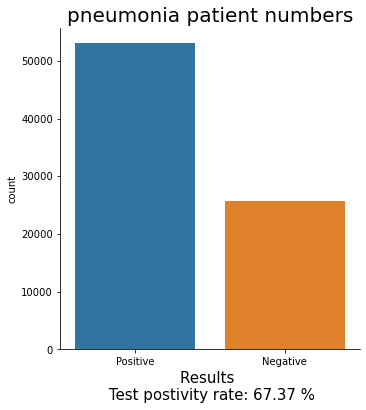

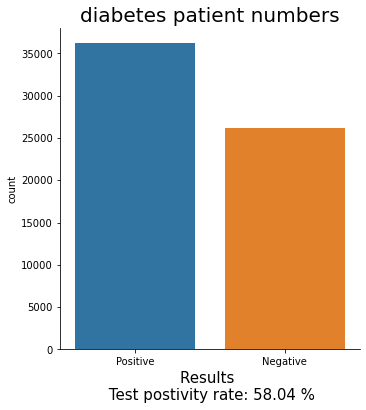

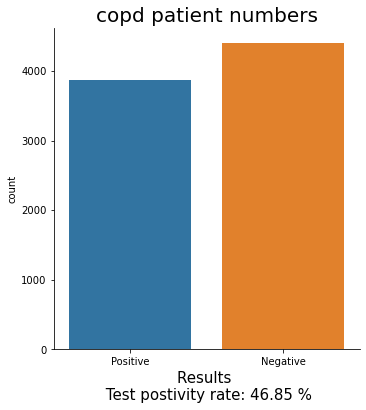

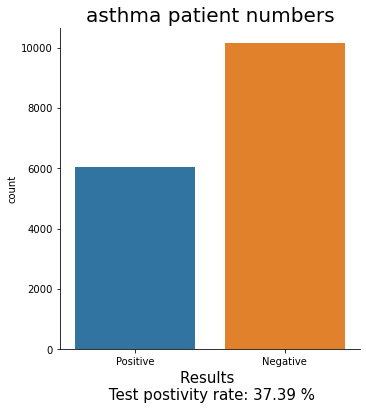

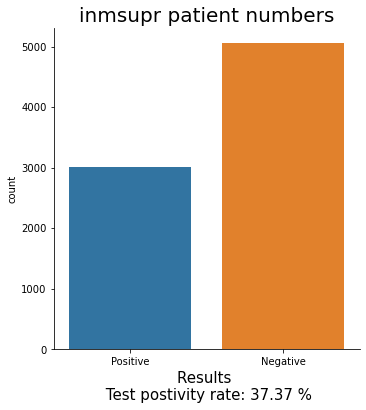

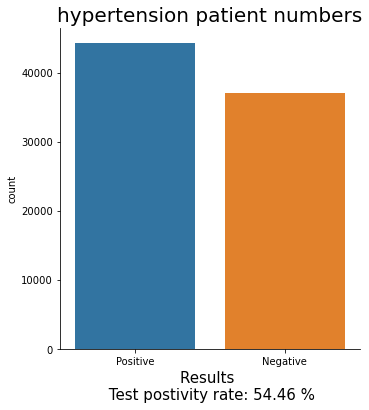

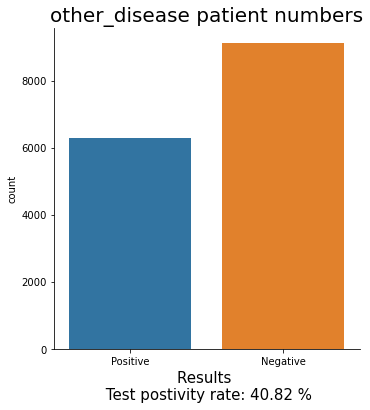

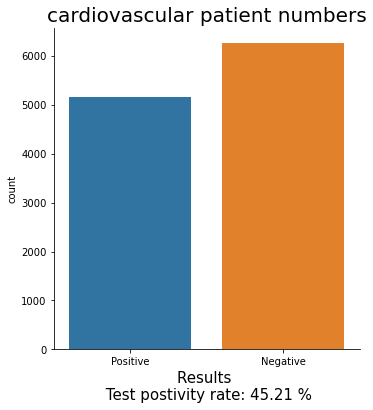

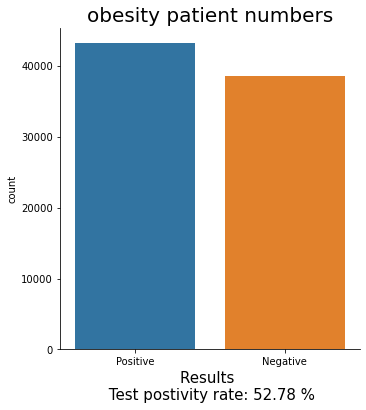

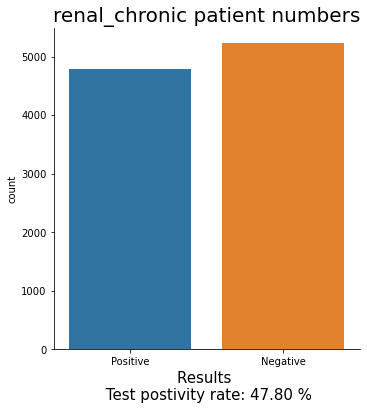

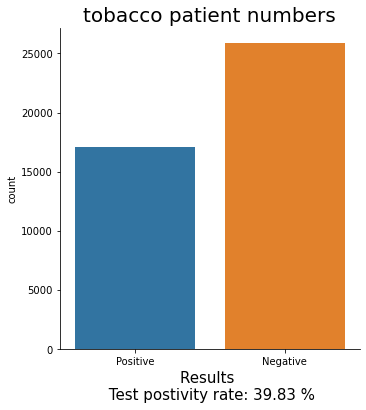

In [50]:
fig2=plt.figure(figsize=(22,100))

# ax1=fig2.add_subplot(11,2,1)
df_pneumonia=df[df['pneumonia']=='Yes']
sns.catplot('covid_res',data=df_pneumonia,kind='count')
plt.title('pneumonia patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_pneumonia['covid_res'].value_counts()[0]/df_pneumonia['covid_res'].size),size=15)
plt.xticks(size=10,)

# ax2=fig2.add_subplot(11,2,2)


# ax3=fig2.add_subplot(11,2,3)
df_icu=df[df['diabetes']=='Yes']
sns.catplot('covid_res',data=df_icu,kind='count')
plt.title('diabetes patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_icu['covid_res'].value_counts()[0]/df_icu['covid_res'].size),size=15)
plt.xticks(size=10)

# ax4=fig2.add_subplot(11,2,4)


# ax5=fig2.add_subplot(11,2,5)
df_icu=df[df['copd']=='Yes']
sns.catplot('covid_res',data=df_icu,kind='count')
plt.title('copd patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_icu['covid_res'].value_counts()[1]/df_icu['covid_res'].size),size=15)
plt.xticks(size=10)

# ax6=fig2.add_subplot(11,2,6)
# # df_icu=df[df['icu']=='Yes']
# # sns.catplot('covid_res',data=df_icu,kind='count')
# # plt.title('ICU patient numbers',size=20)
# # plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
# #     100* df_icu['covid_res'].value_counts()[0]/df_icu['covid_res'].size),size=15)
# # plt.xticks(size=15)

# ax7=fig2.add_subplot(11,2,7)
df_icu=df[df['asthma']=='Yes']
sns.catplot('covid_res',data=df_icu,kind='count')
plt.title('asthma patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_icu['covid_res'].value_counts()[1]/df_icu['covid_res'].size),size=15)
plt.xticks(size=10)

# ax8=fig2.add_subplot(11,2,8)
# # df_icu=df[df['icu']=='Yes']
# # sns.catplot('covid_res',data=df_icu,kind='count')
# # plt.title('ICU patient numbers',size=20)
# # plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
# #     100* df_icu['covid_res'].value_counts()[0]/df_icu['covid_res'].size),size=15)
# # plt.xticks(size=15)

# ax9=fig2.add_subplot(11,2,9)
df_icu=df[df['inmsupr']=='Yes']
sns.catplot('covid_res',data=df_icu,kind='count')
plt.title('inmsupr patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_icu['covid_res'].value_counts()[1]/df_icu['covid_res'].size),size=15)
plt.xticks(size=10)

# ax10=fig2.add_subplot(11,2,10)

# ax11=fig2.add_subplot(11,2,11)
df_icu=df[df['hypertension']=='Yes']
sns.catplot('covid_res',data=df_icu,kind='count')
plt.title('hypertension patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_icu['covid_res'].value_counts()[0]/df_icu['covid_res'].size),size=15)
plt.xticks(size=10)

# ax12=fig2.add_subplot(11,2,12)

# ax13=fig2.add_subplot(11,2,13)
df_icu=df[df['other_disease']=='Yes']
sns.catplot('covid_res',data=df_icu,kind='count')
plt.title('other_disease patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_icu['covid_res'].value_counts()[1]/df_icu['covid_res'].size),size=15)
plt.xticks(size=10)

# ax14=fig2.add_subplot(11,2,14)

# ax15=fig2.add_subplot(11,2,15)
df_icu=df[df['cardiovascular']=='Yes']
sns.catplot('covid_res',data=df_icu,kind='count')
plt.title('cardiovascular patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_icu['covid_res'].value_counts()[1]/df_icu['covid_res'].size),size=15)
plt.xticks(size=10)

# ax16=fig2.add_subplot(11,2,16)

# ax17=fig2.add_subplot(11,2,17)
df_icu=df[df['obesity']=='Yes']
sns.catplot('covid_res',data=df_icu,kind='count')
plt.title('obesity patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_icu['covid_res'].value_counts()[0]/df_icu['covid_res'].size),size=15)
plt.xticks(size=10)

# ax18=fig2.add_subplot(11,2,18)

# ax19=fig2.add_subplot(11,2,19)
df_icu=df[df['renal_chronic']=='Yes']
sns.catplot('covid_res',data=df_icu,kind='count')
plt.title('renal_chronic patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_icu['covid_res'].value_counts()[1]/df_icu['covid_res'].size),size=15)
plt.xticks(size=10)

# ax20=fig2.add_subplot(11,2,20)

# ax21=fig2.add_subplot(11,2,21)
df_icu=df[df['tobacco']=='Yes']
sns.catplot('covid_res',data=df_icu,kind='count')
plt.title('tobacco patient numbers',size=20)
plt.xlabel('Results \n Test postivity rate: {0:.2f} %'.format(
    100* df_icu['covid_res'].value_counts()[1]/df_icu['covid_res'].size),size=15)
plt.xticks(size=10)

# ax22=fig2.add_subplot(11,2,22)

#### Observations
1. There is a high chance of a person being affected by Covid 19, if he/she is a pneumonia patient (67.37 %)
2. Those patient who are diabetic, have high chance of being covid positive (58.04 %)
3. Hypertensed and obese patients have decent 50 % probability of being Covid positive (54 % and 52 % respectively)

Let's analyse now, how people of different age groups relates with Covid positivity
### 6. Age band

In [51]:
df1=df
df1
df1.iloc[:,-2]=df.iloc[:,-2].replace('Positive',1)
df1.iloc[:,-2]=df.iloc[:,-2].replace('Negative',0)
# df1.iloc[:,-2]=df.iloc[:,-2].replace('Results awaited',3)
df1
df1 = df1[df1['covid_res']!=3]

In [52]:
def age_band(age):
    
    if age<2:
        return '0-2'
    elif (age>1) and (age<11):
        return '2-10'
    elif (age>10 and age<21):
        return '10-20'
    elif (age>20 and age<31):
        return '20-30'
    elif (age>30 and age<41):
        return '30-40'
    elif (age>40 and age<51):
        return '40-50'
    elif (age>50 and age<61):
        return '50-60'
    elif (age>60 and age<81):
        return '60-80'
    else:
        return 'Above 80'

<ipython-input-55-2fa6ad34a340>:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_Age_Band = df1.groupby('Age_band')['covid_res','Count'].sum().reset_index()
C:\Users\aa\Anaconda3_2020\lib\site-packages\seaborn\categorical.py:3737: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Covid Positive vs Age group')

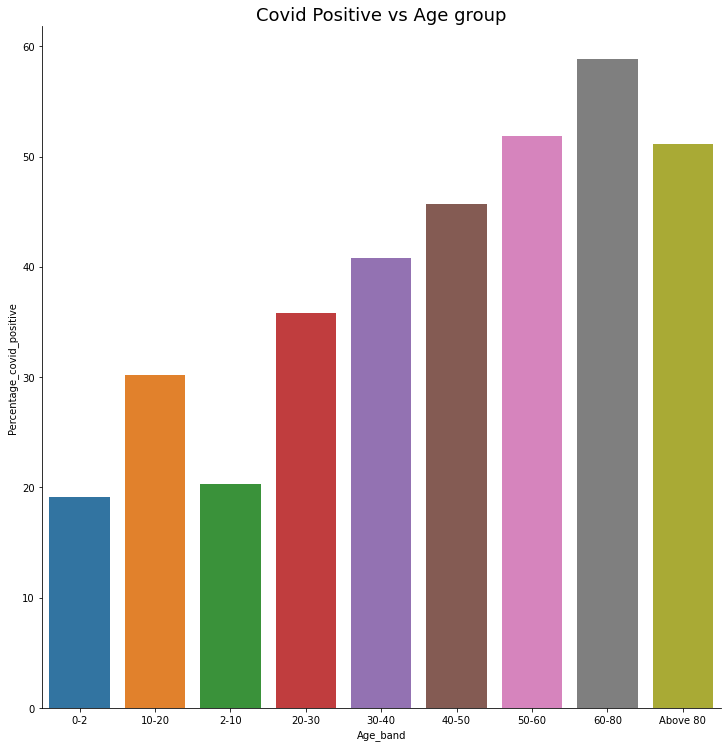

In [55]:
# df_pos=df1[df1['covid_res']=='Positive']
df1['Age_band']=df1['age'].apply(age_band)
df1['Count']=1
df_Age_Band = df1.groupby('Age_band')['covid_res','Count'].sum().reset_index()
df_Age_Band['Percentage_covid_positive']=100*df_Age_Band.covid_res/df_Age_Band.Count
#df_Age_Band.sort_values(by='covid_res',ascending=False).reset_index(drop=True)
df_Age_Band.sort_values(by='Percentage_covid_positive',ascending=False).reset_index(drop=True)

sns.catplot(x = 'Age_band', y ='Percentage_covid_positive', data = df_Age_Band, kind= 'bar', size = 10)
plt.title('Covid Positive vs Age group', size = 18)

#### Observations
1. There is high chance of infection to the people of age group 60-80
2. Senior citizens (age > 50) are most likely to be caught by Covid 19 virus.

Does Covid-19 positivity depends on Gender?, Lets analyse
### 7. Sex
Gender distribution of data

Text(0.5, 0, 'Male- 287112    Female-279486')

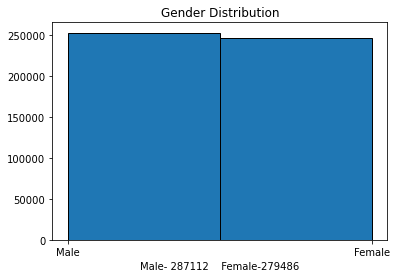

In [57]:
df['sex'].replace(1,'Female',inplace=True)
df['sex'].replace(2,'Male',inplace=True)

plt.hist(df['sex'],bins=2,edgecolor='black')
plt.title('Gender Distribution')
plt.xlabel('Male- 287112    Female-279486')

In [65]:
df_pos=df[df['covid_res']==1]
#df_pos
pos_male = df_pos[df_pos['sex']=='Male']
pos_female = df_pos[df_pos['sex']=='Female']
#pos_female

54.74514744603616
45.25485255396384


Text(0.5, 0, 'Male- 54.75%    Female-45.25%')

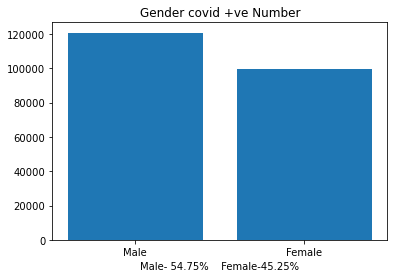

In [75]:
pos=[len(pos_male),len(pos_female)]
gen=['Male','Female']
plt.bar(gen,pos)#,edgecolor='black')
plt.title('Gender covid +ve Number')
male_pos_percent = (len(pos_male)/len(df_pos))*100
female_pos_percent = (len(pos_female)/len(df_pos))*100
print(male_pos_percent)
print(female_pos_percent)
plt.xlabel('Male- 54.75%    Female-45.25%')

C:\Users\aa\Anaconda3_2020\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\aa\Anaconda3_2020\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Gender wise covid+ve age distribution')

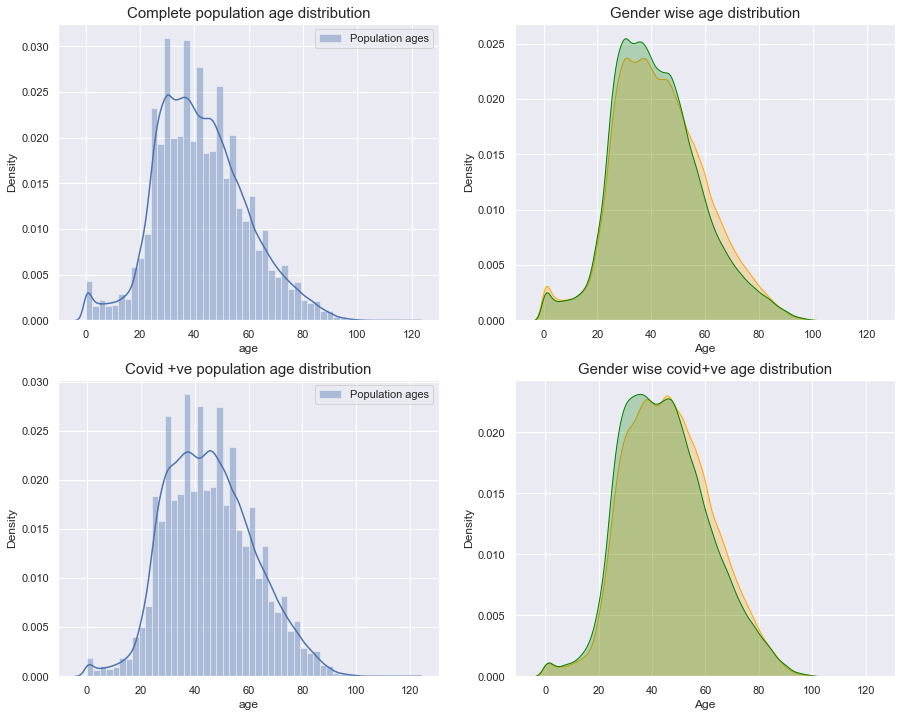

In [76]:
sns.set()
fig1=plt.figure(figsize=(15,12))
ax1=fig1.add_subplot(221)
a=sns.distplot(df['age'],ax=ax1,label='Population ages')
ax1.legend()
ax1.set_title('Complete population age distribution',size=15)
ax2=fig1.add_subplot(222)

df_m=df[df['sex']=='Male']
df_f=df[df['sex']=='Female']

b=sns.kdeplot(df_m['age'],shade=True,ax=ax2,label='Male age distribution',color='orange')
c=sns.kdeplot(df_f['age'],ax=ax2,label='Female age distribution',color='green',shade=True)
ax2.set_xlabel('Age')
ax2.set_title('Gender wise age distribution',size=15)
ax3=fig1.add_subplot(223)
a=sns.distplot(df_pos['age'],ax=ax3,label='Population ages')
ax3.legend()
ax3.set_title('Covid +ve population age distribution',size=15)
ax4=fig1.add_subplot(224)

df_m_pos=df_pos[df_pos['sex']=='Male']
df_f_pos=df_pos[df_pos['sex']=='Female']

b=sns.kdeplot(df_m_pos['age'],shade=True,ax=ax4,label='Male covid+ve age distribution',color='orange')
c=sns.kdeplot(df_f_pos['age'],ax=ax4,label='Female covid+ve age distribution',color='green',shade=True)
ax4.set_xlabel('Age')
ax4.set_title('Gender wise covid+ve age distribution',size=15)

From the above left graph, we can see that we have a bimodal graph with high distribution from 20-60 years. There is also a peak in the lower section of the graph meaning we have high number of infants in our distribution.

On the right, we see that the distribution for both women and men is nearly identical. This is great because it will let us understand the body responses of the sexes with an identical age distribution.

### 8. Case load
In this particular section, we will check how the case loads vary across the dates. Moreover, we will also check the number of days since hospitalisation and symptoms and see if there are any relations with covid +ve.

In [77]:
df['delta']=abs(df['entry_date']-df['date_symptoms'])
df.head()

,sex,patient_type,entry_date,date_symptoms,date_died,age,intubed,pneumonia,pregnancy,diabetes,...,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,delta
0,Male,1,2020-04-05,2020-02-05,NA,27,NaN,No,NaN,No,...,No,No,No,No,No,No,No,1,NaN,60 days
1,Male,1,2020-03-19,2020-03-17,NA,24,NaN,No,NaN,No,...,No,No,No,No,No,No,NaN,1,NaN,2 days
2,Female,2,2020-06-04,2020-01-04,NA,54,No,No,No,No,...,No,No,No,Yes,No,No,NaN,1,No,152 days
3,Male,2,2020-04-17,2020-10-04,NA,30,No,Yes,NaN,No,...,No,No,No,No,No,No,NaN,1,No,170 days
4,Female,2,2020-04-13,2020-04-13,22-04-2020,60,No,No,No,Yes,...,Yes,No,Yes,No,No,No,NaN,1,No,0 days


The delta section in the above dataframe basically shows the number of days since first symptoms and hospitalisation.

First, let us check the case loads of COVID +ve on each of the dates.

In [78]:
df['Count']=1
df_case_load=df.groupby('entry_date')['Count'].count().reset_index()
df_case_load.sort_values(by='entry_date',inplace=True)
df_case_load.head()

,entry_date,Count
0,2020-01-01,5
1,2020-01-02,8
2,2020-01-03,27
3,2020-01-04,1580
4,2020-01-05,3010


(array([18293., 18322., 18353., 18383., 18414., 18444., 18475., 18506.,
        18536., 18567., 18597.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

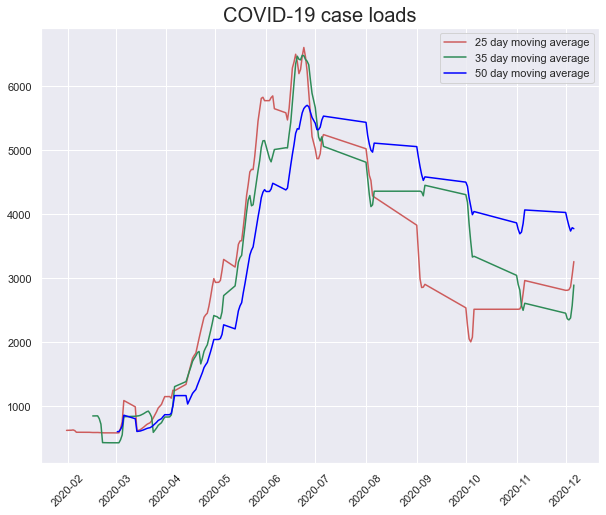

In [79]:
fig1=plt.figure(figsize=(10,8))
ax1=fig1.add_subplot(111)

df_case_load['Moving average_25']=df_case_load['Count'].rolling(25).mean()
df_case_load['Moving average_35']=df_case_load['Count'].rolling(35).mean()
df_case_load['Moving average_50']=df_case_load['Count'].rolling(50).mean()

ax1.plot(df_case_load['entry_date'],df_case_load['Moving average_25'],label='25 day moving average',color='indianred')
ax1.plot(df_case_load['entry_date'],df_case_load['Moving average_35'],label='35 day moving average',color='seagreen')
ax1.plot(df_case_load['entry_date'],df_case_load['Moving average_50'],label='50 day moving average',color='blue')

plt.legend()
plt.title('COVID-19 case loads',size=20)
plt.xticks(rotation=45)

From the above moving average curve, it seems like the infections spread very quickly since the start of April 2020 at an exponential rate. After the month of July 2020, there seems to be a gradual decrease in number of incoming COVID +ve patients.

In [80]:
df_pos=df[df['covid_res']==1]
df_pos

,sex,patient_type,entry_date,date_symptoms,date_died,age,intubed,pneumonia,pregnancy,diabetes,...,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,delta,Count
0,Male,1,2020-04-05,2020-02-05,NA,27,NaN,No,NaN,No,...,No,No,No,No,No,No,1,NaN,60 days,1
1,Male,1,2020-03-19,2020-03-17,NA,24,NaN,No,NaN,No,...,No,No,No,No,No,NaN,1,NaN,2 days,1
2,Female,2,2020-06-04,2020-01-04,NA,54,No,No,No,No,...,No,No,Yes,No,No,NaN,1,No,152 days,1
3,Male,2,2020-04-17,2020-10-04,NA,30,No,Yes,NaN,No,...,No,No,No,No,No,NaN,1,No,170 days,1
4,Female,2,2020-04-13,2020-04-13,22-04-2020,60,No,No,No,Yes,...,No,Yes,No,No,No,NaN,1,No,0 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220652,Female,2,2020-10-06,2020-08-06,10-06-2020,88,No,Yes,No,Yes,...,No,No,No,No,No,NaN,1,No,61 days,1
220653,Female,1,2020-11-06,2020-01-06,NA,30,NaN,No,No,No,...,No,No,No,No,No,NaN,1,NaN,305 days,1
220654,Female,1,2020-11-06,2020-10-06,NA,27,NaN,No,No,No,...,No,No,No,No,No,No,1,NaN,31 days,1
220655,Female,1,2020-06-19,2020-06-16,NA,36,NaN,No,No,No,...,No,No,No,No,No,Yes,1,NaN,3 days,1


In [81]:
df['delta'].value_counts()[0:6]

0 days    78858
2 days    39714
3 days    37190
1 days    36478
4 days    28088
5 days    21274
Name: delta, dtype: int64

In [82]:
df_delta=df[df['delta']<'8 days']

In [83]:
df_delta['Time gap']=df_delta['delta'].astype(str)

df_split=df_delta['Time gap'].str.rsplit('00',expand=True)
df_delta['Time gap']=df_split.iloc[:,0]

<ipython-input-83-1931567f86c3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delta['Time gap']=df_delta['delta'].astype(str)
<ipython-input-83-1931567f86c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_delta['Time gap']=df_split.iloc[:,0]


C:\Users\aa\Anaconda3_2020\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


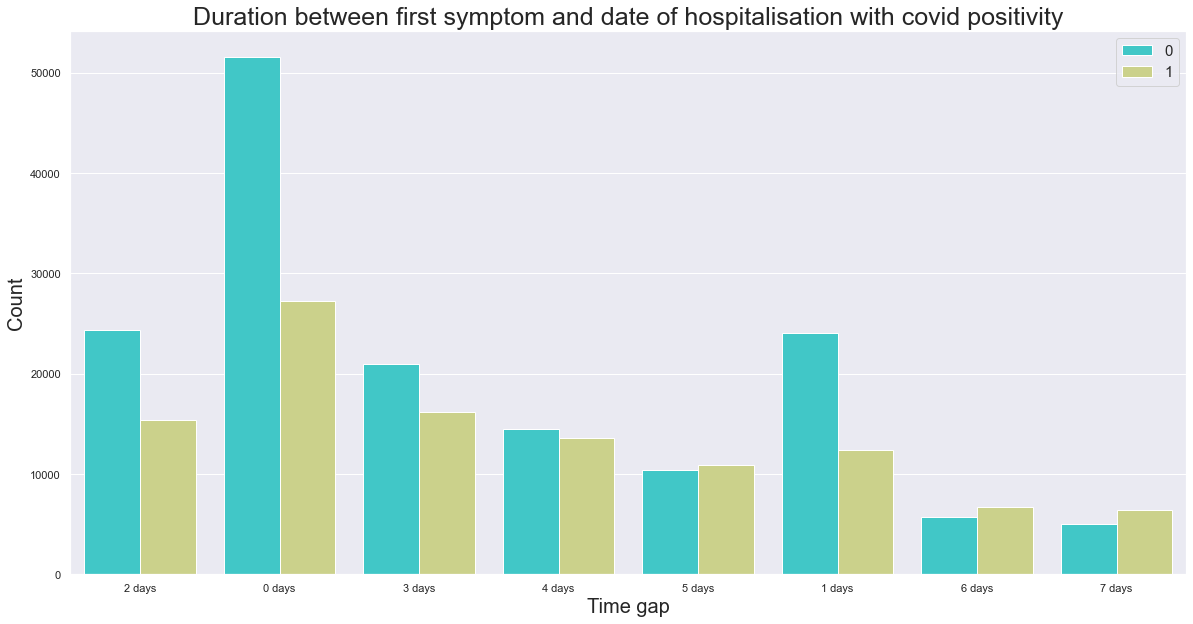

In [87]:
fig=plt.figure(figsize=(20,10))
ax1=fig.add_subplot(111)

g=sns.countplot('Time gap',hue='covid_res',data=df_delta,palette='rainbow',ax=ax1)
ax1.set_ylabel('Count',size=20)
ax1.set_xlabel('Time gap',size=20)
ax1.set_title('Duration between first symptom and date of hospitalisation with covid positivity',size=25)
ax1.legend(fontsize=15)

So as the time gap between Covid symptons and hospitalization increases, probability of being covid positive increases.

Now by data preprocessing and visualization we have gained the understanding of this training dataset.

Additionally let us findout how fatal this Covid-19 is.
### 9. Fatality

In [92]:
df_pos=df[df['covid_res']==1]
df_pos.reset_index(drop=True,inplace=True)
df_pos['Fatal']=np.nan

i=0
for i in range(len(df_pos)):
    if df_pos['date_died'][i]!='NA':
        df_pos['Fatal'][i]='Yes'

df_pos['Fatal']=df_pos['Fatal'].fillna('No')
df_pos['Fatal']

<ipython-input-92-fbac4b889202>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['Fatal']=np.nan
<ipython-input-92-fbac4b889202>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pos['Fatal'][i]='Yes'
C:\Users\aa\Anaconda3_2020\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\

0          No
1          No
2          No
3          No
4         Yes
         ... 
220652    Yes
220653     No
220654     No
220655     No
220656     No
Name: Fatal, Length: 220657, dtype: object

### 9.1 Gender wise fatality

C:\Users\aa\Anaconda3_2020\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Gender wise COVID +ve results')

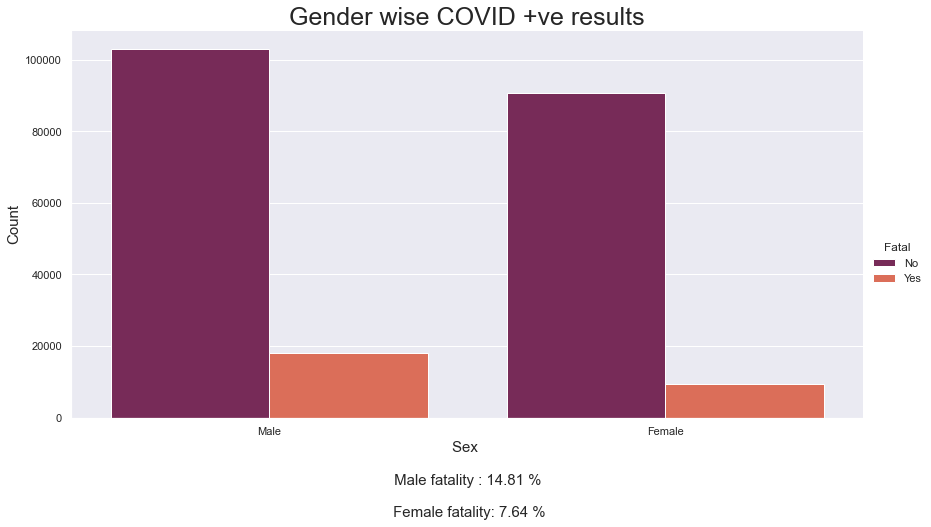

In [93]:
df_m_pos=df_pos[df_pos['sex']=='Male']
df_f_pos=df_pos[df_pos['sex']=='Female']


sns.catplot('sex',data=df_pos,hue='Fatal',kind='count',palette='rocket',aspect=2,height=6)
plt.xlabel('Sex \n \n Male fatality : {0:.2f} % \n \n Female fatality: {1:.2f} %'.format(100*df_m_pos['Fatal'].value_counts()[1]/df_m_pos.shape[0],100*df_f_pos['Fatal'].value_counts()[1]/df_m_pos.shape[0]),size=15)
plt.ylabel('Count',size=15)
plt.title('Gender wise COVID +ve results',size=25)

### 9.2 Fatality w.r.t various health conditions

C:\Users\aa\Anaconda3_2020\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aa\Anaconda3_2020\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aa\Anaconda3_2020\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\aa\Anaconda3_202

Text(0.5, 0, 'Fatality rate: 15.70 %')

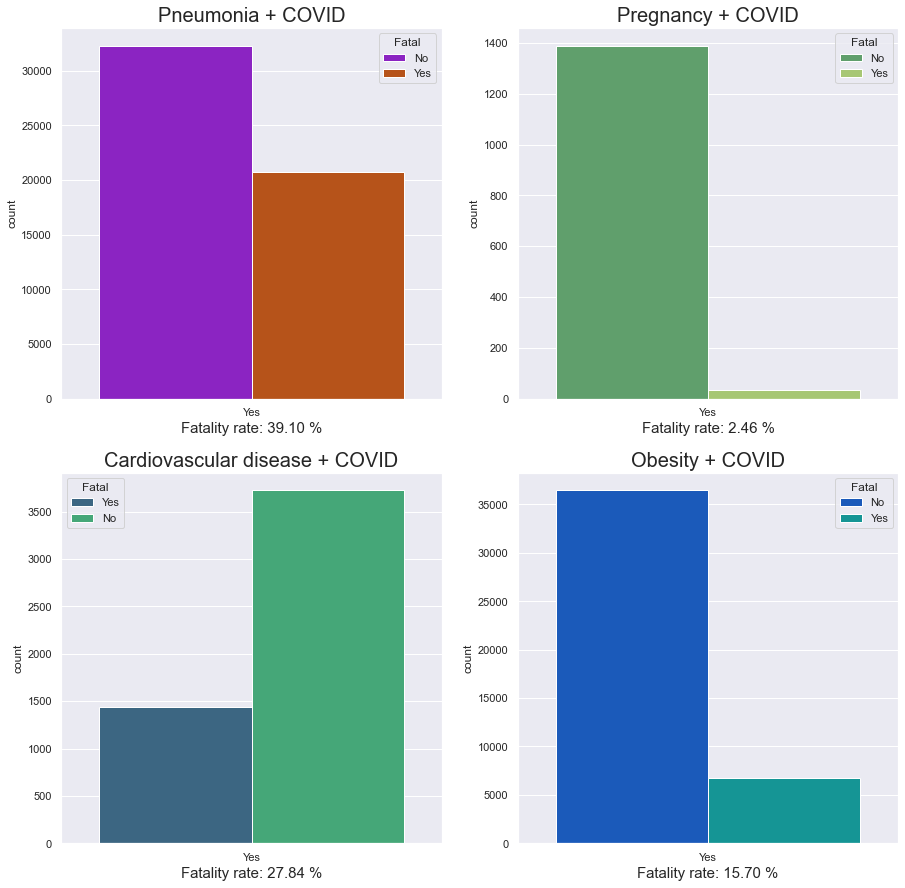

In [96]:
fig2=plt.figure(figsize=(15,15))
ax1=fig2.add_subplot(2,2,1)
ax2=fig2.add_subplot(2,2,2)
ax3=fig2.add_subplot(2,2,3)
ax4=fig2.add_subplot(2,2,4)
df_pneu=df_pos[df_pos['pneumonia']=='Yes']
df_preg=df_pos[df_pos['pregnancy']=='Yes']
df_card=df_pos[df_pos['cardiovascular']=='Yes']
df_obes=df_pos[df_pos['obesity']=='Yes']


sns.countplot('pneumonia',data=df_pneu,hue='Fatal',ax=ax1,palette='gnuplot')
sns.countplot('pregnancy',data=df_preg,hue='Fatal',ax=ax2,palette='summer')
sns.countplot('cardiovascular',data=df_card,hue='Fatal',ax=ax3,palette='viridis')
sns.countplot('obesity',data=df_obes,hue='Fatal',ax=ax4,palette='winter')

ax1.set_title('Pneumonia + COVID',size=20)
ax2.set_title('Pregnancy + COVID',size=20)
ax3.set_title('Cardiovascular disease + COVID',size=20)
ax4.set_title('Obesity + COVID',size=20)






ax1.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_pneu['Fatal'].value_counts()[1]/df_pneu['Fatal'].shape[0]),size=15)


ax2.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_preg['Fatal'].value_counts()[1]/df_preg['Fatal'].shape[0]),size=15)


ax3.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_card['Fatal'].value_counts()[1]/df_card['Fatal'].shape[0]),size=15)


ax4.set_xlabel('Fatality rate: {0:.2f} %'.format(100*df_obes['Fatal'].value_counts()[1]/df_obes['Fatal'].shape[0]),size=15)